# Intro to numerical differentiation. Finding roots.

## Practical code for finding roots of polynomials numerically.

The following are some useful libraries we use later in the code.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import sys

## Polynomial operations

Polynomials are uniquely defined in their canonical form with the array of coefficients.

$$a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \dots + a_n x^n \xleftrightarrow{\text{Equivalent}} \{a_0, a_1, a_2, a_3, \dots, a_n\}$$

That's why, in order to manipulate them in code, it's enough to have the coefficients in a `list`.


### Evaluating polynomials

This is a function that evaluates a polynomial at a given $x$, given the coefficients in the array `coefficients`.

The way it works is:

If the polynomial is $f(x) = a_0 + a_1 x + a_2 x^2 + a_3x^3$, we do the following iterative process:

First, start with $f(x) = 0$. And now we will process the coefficients in decreasing order of the degree, and on each iteration, we multiply our current value by $x$ and add the new coefficient.

1. $f(x) = a_3 + f(x) \cdot x = a_3 + 0\cdot x = a_3$.
2. $f(x) = a_2 + f(x) \cdot x = a_2 + a_3x$
3. $f(x) = a_1 + f(x) \cdot x = a_1 + (a_2 + a_3x)x = a_1 + a_2x + a_3x^2$
4. $f(x) = a_0 + f(x) \cdot x = a_0 + (a_1 + a_2 x + a_3x^2) x = a_0 + a_1x + a_2x^2 + a_3x^3$

After that iterative process, we end up with the value we want.
Below, we have the code for that.

In [4]:
def polynomial(coefficients, x):
    """
    coefficients: [a0, a1, a2, ...] = a_0 + a_1*x + a_2*x^2 + ...
    """
    
    ans = 0
    for a in coefficients[::-1]: # iterate through the coefficients in reverse order (from highest degree to lowest)
        ans = ans*x + a
    return ans
    

**Small test**:

$f(x) = 1 + 2x + 3x^2 \xleftrightarrow{\text{Equivalent}} \{1, 2, 3\}$

$f(2) = 1 + 2\cdot 2 + 3\cdot 2^2 = 1 + 4 + 12 = 17$

In [8]:
assert polynomial([1, 2, 3], 2) == 17, "Wrong value for the polynomial 1 + 2x + 3x^2 evaluated at x=2"

## Taking the derivative of polynomials

The following is a function that computes the derivative of a polynomial.


Given a polynomial $f(x) = a_0 + a_1 x + a_2 x^2 + a_3x^3 + \dots + a_nx^n$, its derivative is
$$\frac{df}{dx} = a_1 + 2a_2x + 3a_3x^2 + \dots + na_nx^{n - 1} \xleftrightarrow{\text{Equivalent}} \{a_1, 2a_2, 3a_3, \dots, na_n\}$$

This function receives the coefficients of the polynomial and returns the coefficients of its derivative

In [9]:
def get_derivative(coefficients):
    """
    coefficients: [a0, a1, a2, ...] = a_0 + a_1*x + a_2*x^2 + ...
    derivative: [a1, 2*a2, 3*a3, ...] = a_1 + 2*a_2*x + 3*a_3*x^2 + ...
    """
    
    result = []
    for i in range(1, len(coefficients)): # iterates through a1, a2, a3, ...
        result.append(i*coefficients[i])
    return result

**Small test**:

$f(x) = 1 + 2x + 3x^2 + 4x^3 \xleftrightarrow{\text{Equivalent}} \{1, 2, 3, 4\}$

$f'(x) = 2 + 6x + 12x^2 \xleftrightarrow{\text{Equivalent}} \{2, 6, 12\}$

In [12]:
assert get_derivative([1, 2, 3, 4]) == [2, 6, 12], "Wrong derivative for the polynomial 1 + 2x + 3x^2 + 4x^3"

## Newton's method

Newton's method makes use of a linear approximation of the function (we take the first two terms of the Taylor's series of the function).

If we have a function $f(x)$, we can approximate it linearly near the point $x_0$ by:
$$f(x) \approx f(x_0) + f'(x_0) (x - x_0)$$

Thus, if we want to find a root of $f(x)$ near $x_0$, we can do:
$$0 = f(x_0) + f'(x_0) (x - x_0)$$
That gives us $$x = x_0 - \frac{f(x_0)}{f'(x_0)}$$

![Newton's method example](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Newton_iteration.svg/620px-Newton_iteration.svg.png)

That gives us the root of the tangent line of the function at the point $x_0$, but also moves us closer to the root of the function.

We can continue doing that process until we're close enough. That gives an algorithm like this:

$$
\begin{align*}
&\text{for } i \in \{0, 1, \ldots, n\_steps - 1\}: \\
&\quad \begin{aligned}
    &\quad \begin{aligned}
        x_{i+1} &= x_i - \frac{f(x_i)}{f'(x_i)}
    \end{aligned}
\end{aligned}
\end{align*}
$$

The algorithm stops when it does `n_steps` iterations. We can control that by just changing the value of `n_steps`.
We can also control the number of iterations by measuring how close is $f(x_i)$ to $0$. That means that, as soon as $|f(x_i)| < \epsilon$, where $\epsilon$ is a very small number close to 0 (for e.g: $10^{-5}$).



In [19]:
def newton(coefficients, x0 = 1, n_steps = 100, threshold = 1e-5):
    """
    coefficients: [a0, a1, a2, ...] = a_0 + a_1*x + a_2*x^2 + ...
    x0: initial guess
    """
    
    derivative_coeffcients = get_derivative(coefficients)
    x = x0
    for iter in range(n_steps):
        fx = polynomial(coefficients, x) # f(x)
        dfx= polynomial(derivative_coeffcients, x) # f'(x)
        delta_x = fx / dfx
        x = x - delta_x
        
        if abs(fx) < threshold:
            break
        
    
    return x

**Small test**:

$f(x) = x^2 - 3 \xleftrightarrow{\text{Equivalent}} \{-3, 0, 1\}$

The roots are $-\sqrt{3}$ and $\sqrt{3}$. Our algorithm should find one of the two, depending on where it starts ($x_0$).


In [20]:
c = [-3, 0, 1] # -3 + x^2
root1 = newton(c, x0 = -2, threshold = 1e-5) # starting from -2
root2 = newton(c, x0 = 2, threshold = 1e-5) # starting from 2

assert abs(root1 + np.sqrt(3)) < 1e-5, "Wrong root for the polynomial -3 + x^2" # testing it finds sqrt(3)
assert abs(root2 - np.sqrt(3)) < 1e-5, "Wrong root for the polynomial -3 + x^2" # testing it finds -sqrt(3)
assert abs(polynomial(c, root1)) < 1e-5, "Wrong root for the polynomial -3 + x^2" # testing f(root1) ≈ 0
assert abs(polynomial(c, root2)) < 1e-5, "Wrong root for the polynomial -3 + x^2" # testing f(root2) ≈ 0

## Bisection method

An alternative method to find a root of a function $f(x)$ in a range $(a, b)$ is the **Bisection Method**.

We will have the following assumptions:
- $f(x)$ is differentiable in the range $(a, b)$.
- $f(a)$ and $f(b)$ have opposite signs. This means one of:
    - $f(a)< 0$ and $f(b) > 0$
    - $f(a) > 0$ and $f(b) < 0$

Then, due to the [Intermediate Vaule Theorem](https://en.wikipedia.org/wiki/Intermediate_value_theorem), we know there's at least a root in the range $[a, b]$.

![Intermediate Value Theorem Example](https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Illustration_for_the_intermediate_value_theorem.svg/756px-Illustration_for_the_intermediate_value_theorem.svg.png)

Our invariant property (and we'll keep it that way all the time) is that $f(a)$ and $f(b)$ have opposite signs (that guarantees having a root in $(a, b)$).

The algorithm works this way:

We pick a point $x \in (a, b)$ and evaluate $f(x)$.
- If $f(x)$ has the same sign as $f(a)$, then $f(x)$ and $f(b)$ have opposite signs (due to the invariant property), which means there is a root in the range $(x, b)$.
- Otherwise, then $f(x)$ has the opposite of $f(a)$, which means there's a root in the range $(a, x)$.
In both cases, we find a narrower interval that contains a root and keeps the invariant property.

That gives us an algorithm to find a root iteratively. For as long as we want, we pick the middle point of the current range, and according to the previous conditions, we decide to move to the left side or the right side of the range. That way, the range in which we are searching the root, gets halved each time, and after some time, it becomes so narrow that any number in the range will be close enough to the real root.


In [21]:
def bisection(coefficients, a, b, threshold = 1e-10):
    
    fa = polynomial(coefficients, a) 
    fb = polynomial(coefficients, b)
    
    assert fa * fb < 0 # assume fa and fb have different signs (fa * fb < 0)
    
    while b - a > threshold: # as long as the search interval is large enough
        m = (a + b) / 2 # pick the middle point
        fm = polynomial(coefficients, m) # evalute f at the middle point
        if fa * fm > 0: # checking f(a) and f(m) have opposite signs
            a = m
            fa = fm
        else:
            b = m
    return (a + b) / 2 # return any point in the range (a, b), here we return the middle point

**Small test**:

$f(x) = x^2 - 3 \xleftrightarrow{\text{Equivalent}} \{-3, 0, 1\}$

The roots are $-\sqrt{3}$ and $\sqrt{3}$. Our algorithm should find one of the two, depending on where it starts ($x_0$).


In [27]:
c = [-3, 0, 1] # -3 + x^2
root1 = bisection(c, a = -2, b = 0) # search in the range [-2, 0]
root2 = bisection(c, a = 0, b = 2) # search in the range [0, 2]

assert abs(root1 + np.sqrt(3)) < 1e-5, "Wrong root for the polynomial -3 + x^2" # testing it finds sqrt(3)
assert abs(root2 - np.sqrt(3)) < 1e-5, "Wrong root for the polynomial -3 + x^2" # testing it finds -sqrt(3)
assert abs(polynomial(c, root1)) < 1e-5, "Wrong root for the polynomial -3 + x^2" # testing f(root1) ≈ 0
assert abs(polynomial(c, root2)) < 1e-5, "Wrong root for the polynomial -3 + x^2" # testing f(root2) ≈ 0

## What to do with multiple roots?
For simplicity, let's assume they're all different.


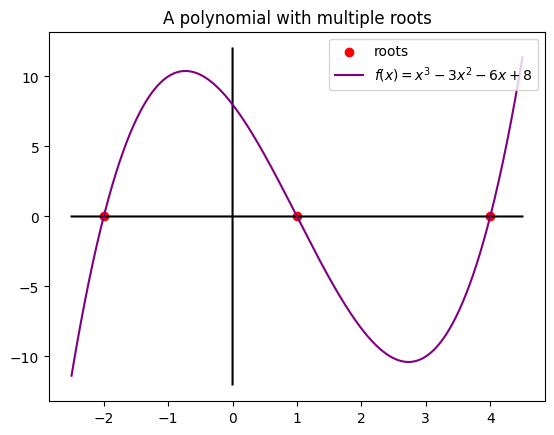

That polynomial has 3 roots. However, our algorithms (both Newton's and Bisection methods) will find only one, and that one they find depends on where the algorithms start.

In particular, with the bisection method, we can explicitly control in which range to do the search by just setting the initial endpoints of the interval.

Then, what we need to do in order to find all the roots is to split the $X$-axis into blocks, guaranteeing that there is at most a single root in every block. Then, we can use Bisection method on each block.

The question is: **How to pick the blocks?**

We can pick the blocks $[l_i, r_i]$ in a way that $f(l_i) \cdot f(r_i) < 0$ (that's what we want in Bisection's method).

In particular, we can pick the blocks such that both $f(l_i)$ and $f(r_i)$ are extrema points (minima or maxima).


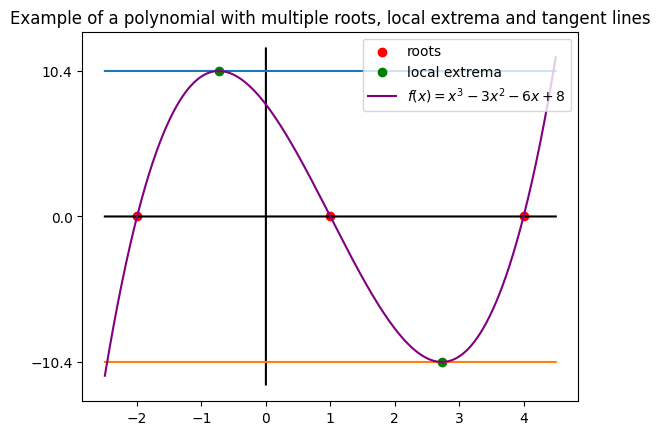

In the image above, the extrema points are at the points $l = 1 - \sqrt{3}$ and $r = 1 + \sqrt{3}$.

What we see is that we can run the Bisection method separetly in the intervals $(-\infty, 1-\sqrt{3})$, $(1-\sqrt{3},1+\sqrt{3})$, and $(1+\sqrt{3}, \infty)$, and it will find a root on each of them (namely, -2, 1, and 4).

**How to find the extrema points?**

Well, we know the extrema points are roots of the derivative. Therefore, we just need to find the roots of $\frac{df}{dx}$, which is another polynomial with one less degree.

WAIT A MINUTE...WE NEED THE **ROOTS OF $f'(x)$** TO FIND THE **ROOTS OF $f(x)$.**

Similarly, we need the roots of $f''(x)$ in order to find the roots $f'(x)$.


This states a recurrent problem: The problem of finding the roots of a polynomial of degree $n$ involves finding the roots of a polynomial of degree $n-1$.

Naturally, we can solve this problem recurrently as well.
We can have a recursive algorithm that receives a polynomial of degree $n$ (let it be $P_n$), and in order to find ot roots of $P_n$, it uses the roots of a polynomial $P_{n-1}$, and so on...until $n=1$. Finding the root of a polynomial of degree 1 (let be it $y=ax+b$) is trivial: it's just $\frac{-b}{a}$.


That gives us our final algorithm:


## Using Bisection method and recursion in order to find all roots!

In [97]:
def find_roots(coefficients, left, right): # left and right are (-inf, inf) virtual boundaries
    if len(coefficients) == 2: # degree = 1
        return [-coefficients[0] / coefficients[1]]
    derivative_coefficients = get_derivative(coefficients)
    extrema = find_roots(derivative_coefficients, left, right)
    extrema = [left] + extrema + [right]
    roots = []
    for i in range(len(extrema) - 1):
        root = bisection(coefficients, extrema[i], extrema[i + 1])
        roots.append(root)
    return roots 

This is what we're doing:
1. We have a polynomial $P_n(x)$ of degree $n$. We want its roots.
2. First, we find its derivative $P_{n-1}(x) = P'_{n}(x)$, and recursively find the roots of $P_{n-1}(x)$
3. Once we have the roots of $P_{n-1}(x)$ (let them be $r_1, r_2, \dots, r_{n-1}$), these are extremum points of $P_n(x)$.
4. For each pair of adjacent roots ($r_i, r_{i + 1}$), apply the bisection method in order to find a root in the range $(r_i, r_{i+1})$. Also apply the bisection method in the range $(-\infty, r_1)$ and in the range $(r_{n-1}, \infty)$.
5. Report the roots found.

Our base case is when the polynomial we have has degree 1 ($P_1(x) = a_0 + a_1x$), then its only root is $\frac{-a_0}{a_1}$.

## Small test

In [103]:
c = [8, -6, -3, 1]
roots = find_roots(c, -5, 5)
assert len(roots) == 3
assert abs(roots[0] + 2) < 1e-5 # testing it finds the root -2 
assert abs(roots[1] - 1) < 1e-5 # testing it finds the root 1
assert abs(roots[2] - 4) < 1e-5 # testing it finds the root 4